# Social Network Analysis @ UNIPI
### 13/01/2023 - first part (sull'overleaf: third_full(1stpart))


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# First Half

## Exercise 1: Synthetic Models [4 points]

Let G be a ER graph with N = 6000 and p = 0.0001
- How many edges does G have?
- In which regime is G?
- What is the expected value of m for the BA graph having the same density?
- What fraction of edges is incident on the BA equivalent largest hub?

In [2]:
n = 6000
p = 0.0001
e_max = (n*(n-1))/2
e = e_max * p
e

1799.7

Supercritical regime

In [3]:
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n

(True, False, False, False)

In [4]:
m = e/n
m

0.29995

In [5]:
kmax = m * n**(1/2)
kmax

23.234027093898295

In [6]:
ratio = kmax/e
ratio

0.012909944487358056

## Exercise 2: Graph Construction [6 points]

Given 12 nodes - identified with letters - and, at most, 24 edges build a
graph such that all the following conditions hold:
- The graph is composed by two components;
- The shortest path connecting A and B has length equal to 3;
- The clustering coefficient of B and D is, respectively, $\frac{1}{3}$ and $\frac{1}{2}$ (B and D share at least a neighbor);
- Node C has the highest degree centrality;
- Node F has the lowest Closeness Centrality;
- Edge (A, E) has the highest betweenness centrality.

## Exercise 3: Graph Analysis [6 points]

Given the directed graph G:
- Compute its diameter;
- List all the shortest paths among the pairs (i,f), (c,e) and (a,d);
- Write its adjacency matrix;
- What's the size of G's maximal clique?
- Compute the closeness centrality of  f, h and  c; 
- Compute the clustering coefficient of a, e and d; 
- Verify the presence of Eulerean and Hamiltonian cycles.

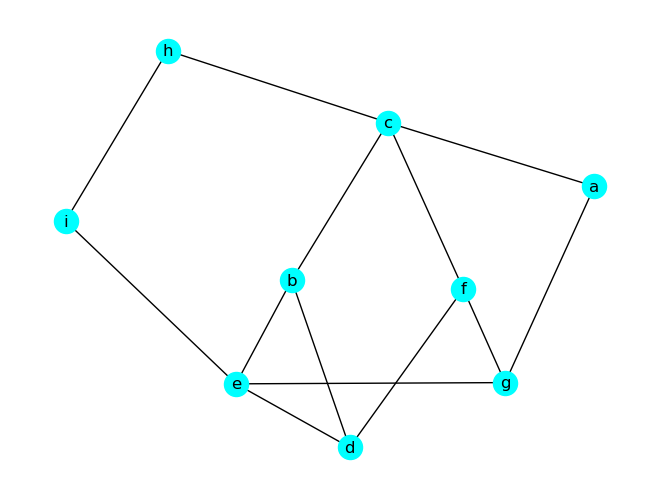

In [7]:
g = nx.Graph()

g.add_edge("a","c")
g.add_edge("b","c")

g.add_edge("b","d")
g.add_edge("b","e")

g.add_edge("c","f")
g.add_edge("d","e")
g.add_edge("d","f")

g.add_edge("e","g")
g.add_edge("f","g")

g.add_edge("a","g")
g.add_edge("c", "h")
g.add_edge("i", "h")

g.add_edge("i", "e")


nx.draw(g, with_labels = True, node_color='cyan')

In [8]:
nx.diameter(g)

3

In [9]:
nx.shortest_path(g, "i", "f")

['i', 'h', 'c', 'f']

In [10]:
nx.shortest_path(g, "c", "e")

['c', 'b', 'e']

In [11]:
nx.shortest_path(g, "a", "d")

['a', 'c', 'b', 'd']

In [12]:
mat = nx.adjacency_matrix(g)
mat.todense()

matrix([[0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [13]:
nx.clustering(g, "a")

0

In [14]:
nx.clustering(g, "e")

0.16666666666666666

In [15]:
nx.clustering(g, "d")

0.3333333333333333

In [16]:
nx.closeness_centrality(g, "f"), nx.closeness_centrality(g, "h", wf_improved=False), nx.closeness_centrality(g, "c", wf_improved=False)

(0.5714285714285714, 0.5, 0.6666666666666666)

# Second Half

## Exercise 1: Open Questions [4 points]
- Q1: What are local and global bridges? Describe at least an application for which their identification is a key step.
- Q2: What does the "Six Degrees of separation" theory postulates? Do you remember any experiments that were set in plate to validate it?

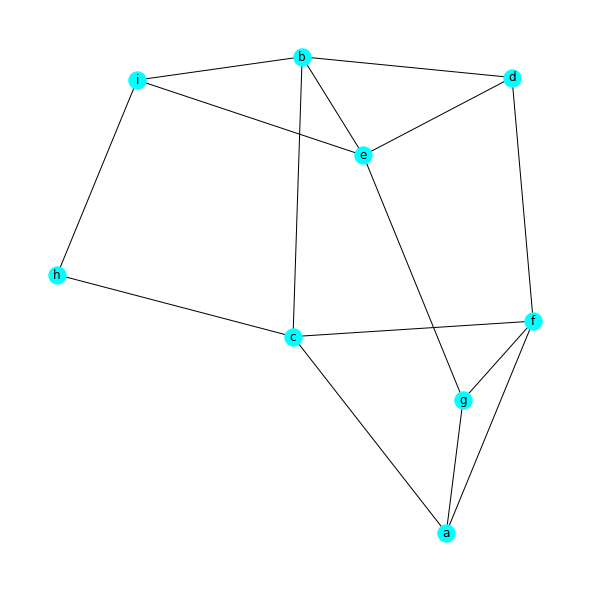

In [179]:
g = nx.Graph()
g.add_edge("a","c")
g.add_edge("b","c")

g.add_edge("b","d")
g.add_edge("b","e")

g.add_edge("c","f")
g.add_edge("d","e")
g.add_edge("d","f")

g.add_edge("e","g")
g.add_edge("f","g")

g.add_edge("a","g")
g.add_edge("c", "h")
g.add_edge("i", "h")

g.add_edge("i", "e")
g.add_edge("i", "b")
g.add_edge("f", "a")


nx.draw(g, with_labels = True, node_color='cyan')

## Exercise 2: Community Evaluation [4 points]
Given the Graph G in Figure 1(a) compare the following partitions:
- P1 [A,G,F,C], [D,B,E,I,H]
- P2 [D,B,E], [I,C,H], [A,G,F]

Which partition is the best with respect to average node degree (AND)? and for modularity?

In [180]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    return ((vc/e) - (degC/(2*e)))**2

In [181]:
P1 = [['a','g','f','c'], ['d','b','e','i','h']]
P2 = [['d','b','e'],['i','c','h'], ['a','g','f']]

In [182]:
f"P1 - C1: {modularity(g, P1[0])} C2: {modularity(g, P1[1])}"

'P1 - C1: 0.04000000000000001 C2: 0.04000000000000001'

In [183]:
f"P2 - C1: {modularity(g, P2[0])} C2: {modularity(g, P2[1])} C3: {modularity(g, P2[2])}"

'P2 - C1: 0.027777777777777766 C2: 0.009999999999999995 C3: 0.01777777777777777'

In [184]:
max([0.04, 0.009])

0.04

In [185]:
def AND(graph, community):
    sg = nx.subgraph(graph, community)
    degs = [i[1] for i in nx.degree(sg)]    
    vc = sg.number_of_nodes()
    try:
        return sum(degs)/vc
    except:
        return 0

In [186]:
f"P1 - C1: {AND(g, P1[0])} C2: {AND(g, P1[1])}"

'P1 - C1: 2.5 C2: 2.4'

In [187]:
f"P2 - C1: {AND(g, P2[0])} C2: {AND(g, P2[1])} C3: {AND(g, P2[2])}"

'P2 - C1: 2.0 C2: 1.3333333333333333 C3: 2.0'

In [188]:
max([2.5, 1.33])

2.5

## Exercise 3: Threshold Model [4 points]
Given the graph G shown in Figure 1 apply the threshold model considering the following scenarios:

- S1
    - Set of initial infected nodes: I = {'g'}
    - Node threshold $\tau = \frac{1}{3}$
- S2
    - Set of initial infected nodes: I = {'d'}
    - Node threshold at iteration $t$ $\tau_t = \frac{1}{2+t}$
  
Consider a node infected at time $t$ iff at least $\tau\%$ of its neighbors were already infected at $t-1$.

In [193]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", ['g'])

# Setting node parameters
threshold = 1/3
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(6)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: ['g']
Iteration: 1 Infected: ['a']
Iteration: 2 Infected: ['f']
Iteration: 3 Infected: ['c', 'd']
Iteration: 4 Infected: ['b', 'e', 'h']
Iteration: 5 Infected: ['i']


In [195]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", ['d'])

model.set_initial_status(config)

for t in range(6):
    # threshold update
    threshold = 1/(2+t)
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: ['d']
Iteration: 1 Infected: []
Iteration: 2 Infected: ['b', 'e', 'f']
Iteration: 3 Infected: ['a', 'c', 'g', 'i']
Iteration: 4 Infected: ['h']
Iteration: 5 Infected: []


## Exercise 4: Hypergraphs [4 points]
Given the hypergraph H:
- compute its incidence and adjacency matrixes;
- visualize its dual;
- visualize its left and right projections;
- visualize its 2-line graph;
- does it contains any 2-walk? if so list them. If not, define an s-walk

In [164]:
import hypernetx as hnx

In [165]:
hed = {
    'A': (1,2,3,4),
    'B': (5,6),
    'C': (3,6),
    'D': (7,1,2),
    'E': (3,4),
}

H = hnx.Hypergraph(hed)

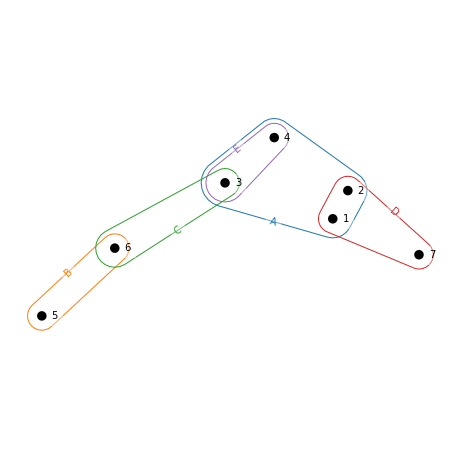

In [166]:
hnx.draw(H)

In [167]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [168]:
M_aux1 = H.auxiliary_matrix(s=1)
M_aux1.toarray()

array([[0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

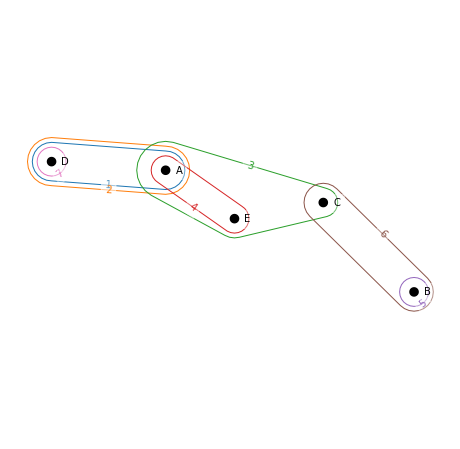

In [169]:
HD = H.dual()
hnx.draw(HD)

In [170]:
bi = H.bipartite()
nx.is_bipartite(bi)

True

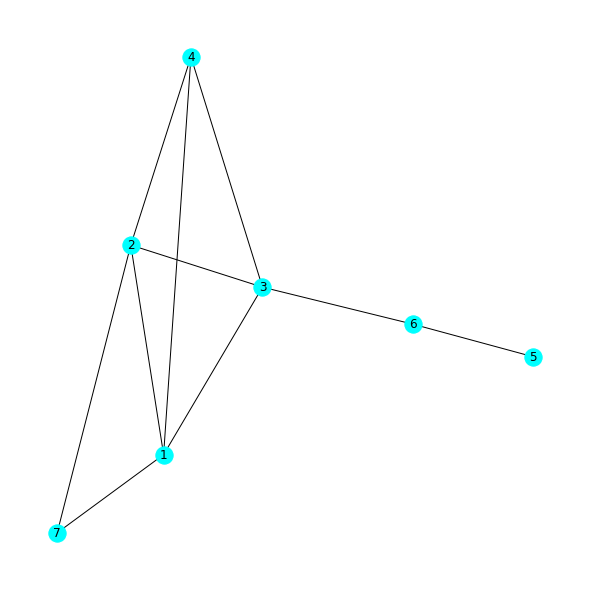

In [172]:
left = nx.projected_graph(bi, [1,2,3,4,5,6])
nx.draw(left, with_labels = True, node_color='cyan')

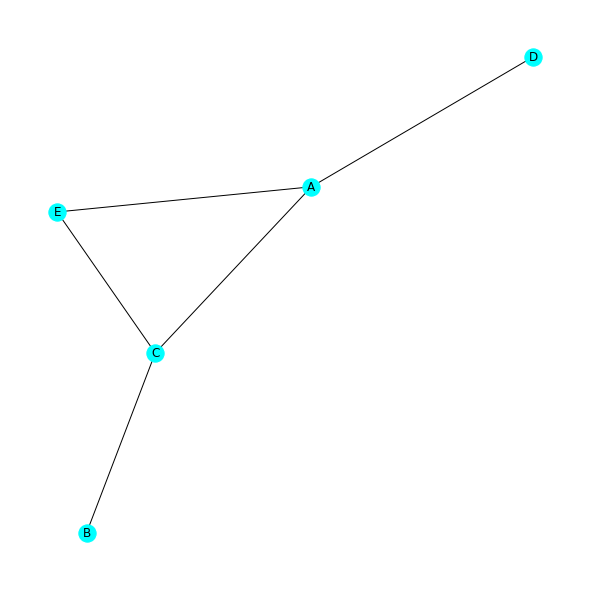

In [173]:
right = nx.projected_graph(bi, ['A','B','C','D','E'])
nx.draw(right, with_labels = True, node_color='cyan')

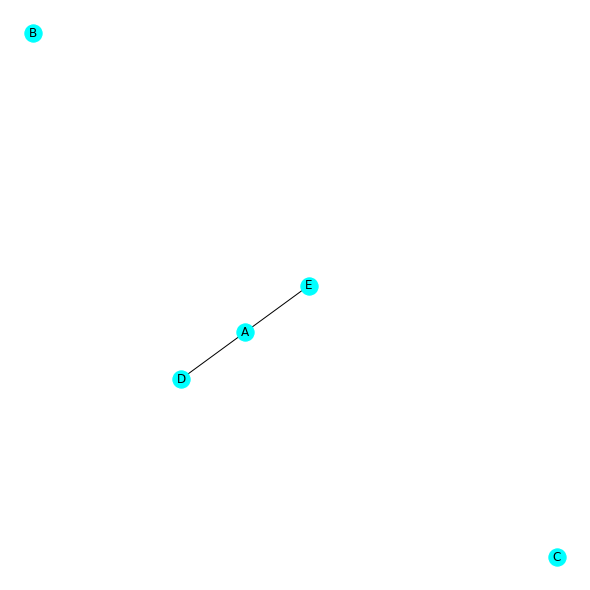

In [174]:
i = 2
A = dict()
g = dict()

A[i],names = H.edge_adjacency_matrix(s=i,index=True)
A[i] = A[i].todense()
g[i] = nx.from_numpy_matrix(A[i])  ## corresponding line graph
nx.relabel.relabel_nodes(g[i],names,copy=False)
nx.draw(g[i], with_labels=True, node_color='cyan');

By definition all edges in a 2-line graphs describes 2-walks, i.e. paths in which adjacent hyperedges share at least 2 nodes.